In [7]:
import calendar
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def load_netcdf(path, year):
    """
    lat.shape=280
    lon.shape=360
    """
    nc = netCDF4.Dataset(path)
    lat = nc['latitude'][:]
    lon = nc['longitude'][:]
    precip = nc['precip'][:]
    if calendar.isleap(year):
        precip = np.reshape(precip, (366, 280, 360))
    else:
        precip = np.reshape(precip, (365, 280, 360))
    precip = precip[:, ::-1, :]
    return lat, lon, precip

In [14]:
def netcdf_to_csv(precip, csv_path='precip.csv'):
    precip = precip.reshape(-1)
    df_precip = pd.DataFrame(data=precip)
    df_precip.to_csv(csv_path)

In [15]:
# create arrary: array=[year, month, variable, lat, lon]
def main():
    save_lst = []
    for year in range(1951, 2008):
        """ aphrodite1 contains 57 years daily dataset"""
        path = f"/docker/mnt/d/research/D1/data/aphrodite/V1101_MA_025d/APHRO_MA_025deg_V1101.{year}.nc"
        lat, lon, precip = load_netcdf(path, year)
        save_lst.append(precip)
        csv_path = f"precip_{year}"
        netcdf_to_csv(precip, csv_path)
    save_lst = np.array(save_lst)
    print(save_lst.shape)

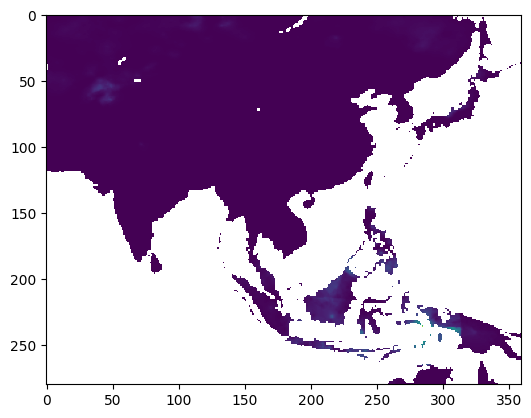

In [16]:
year = 1974
path = f"/docker/mnt/d/research/D1/data/aphrodite/V1101_MA_025d/APHRO_MA_025deg_V1101.{year}.nc"
lat, lon, precip = load_netcdf(path, year)
plt.imshow(precip[0])
plt.show()
netcdf_to_csv(precip)